## Machine Learning: Using the Normal Equation for Linear Regression

In this section I will go through implementing the normal equation to find the thetas that provide the best fit to the training data. 

##$$ \theta = (X^T X)^{-1}X^T \vec{y} $$

My primary aim in this tutorial is to illustrate how to implement the normal equation with [numpy](http://www.numpy.org) and [pandas](http://pandas.pydata.org). In order to avoid getting bogged down with managing complex data I have purposefully chosen to use a simple data set.

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Getting and organizing the data

First we need to initialize the training set, and place it in a pandas [DataFrame](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/). In this case we have 3 examples, each with one feature **x0**, and a corresponding target **y**. 

If you want to read from a data file instead, [Pandas support IO for a wide collection of file types](http://pandas.pydata.org/pandas-docs/stable/io.html).


In [160]:
trainingData = pd.DataFrame(data=[[1,1], [2,2], [4,4]], columns=['x1', 'y'])
trainingData

,x1,y
0,1,1
1,2,2
2,4,4


Next we append the column of 1's (x0) to matrix using the [numpy ones function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), and the pandas [column insert](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.insert.html). 

In [161]:
trainingData.insert(0, 'x0', np.ones(3))
trainingData

,x0,x1,y
0,1,1,1
1,1,2,2
2,1,4,4


Now that we have the data lets plot ([using seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)) it to get some intuition for what hypothesis function might be.

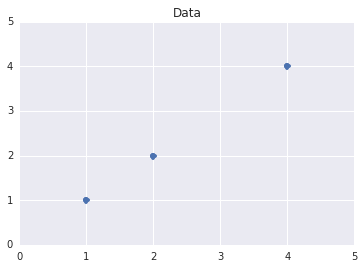

In [188]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    ax.plot(trainingData['x1'], trainingData['y'], 'o', label='Data')
    ax.set_title('Data')
    ax.set(ylim=(0, 5))
    ax.set(xlim=(0, 5))

From the above plot we gater that the hypothesis is generally of the form:

## $$ h_\theta(x) = \theta_0 + \theta_1x_1 $$

Furthermore its easy to see that it is actually:
## $$ h_\theta(x) = x $$

And our thetas are: 
##$$   \theta_0 = 0, \theta_1 = 1 $$

Now let's use the normal equation to confirm our belief. To begin we constructing the design matrix **X** and the target vector **y**.

In [163]:
X = trainingData[['x0', 'x1']]
y = trainingData[['y']]

Next we transpose X, using a shorthand (T) for the pandas [transpose method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html). Since we are transposing a 3x2 matrix we can expect to end up with a 2x3 matrix as a result.

##$$ X^T $$

In [164]:
X.T

,0,1,2
x0,1,1,1
x1,1,2,4


##Applying the Normal Equation

Next we calculate X transpose multiplied by X. Since we are doing matrix multiplication, as opposed to scalar, we will need to use the [pandas DataFrame.dot() function](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.dot.html) function.
## $$ (X^TX) $$

In [165]:
xTx = X.T.dot(X)
xTx

,x0,x1
x0,3,7
x1,7,21


We then take the inverse of our product using the [numpy inverse function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)
## $$ (X^TX)^{-1} $$

In [166]:
XtX = np.linalg.inv(xTx)
XtX

array([[ 1.5       , -0.5       ],
       [-0.5       ,  0.21428571]])

We multiply the inverse by the transpose of x, which we previously calculated.
## $$ (X^TX)^{-1} X^T$$

In [167]:
XtX_xT = XtX.dot(X.T)
XtX_xT

array([[ 1.        ,  0.5       , -0.5       ],
       [-0.28571429, -0.07142857,  0.35714286]])

Finally we multiply the previous result by our target vector
## $$ (X^TX)^{-1} X^T\vec{y}$$

In [168]:
theta = XtX_xT.dot(y)
theta

array([[ 0.],
       [ 1.]])

## Final Result

##$$ 
\begin{equation}
     \theta=\begin{bmatrix}
         0 \\
         1 \\
        \end{bmatrix}
  \end{equation}
  $$
  
We visually confirm our results with the a plot:

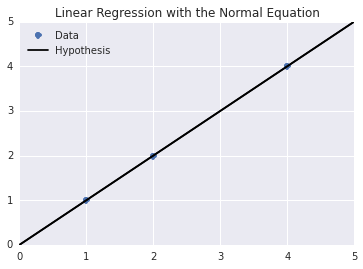

In [183]:
hypothesis = [(x, theta[0] + x*theta[1]) for x in range(6)]

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    ax.set_title('Linear Regression with the Normal Equation')
    ax.plot(trainingData['x1'], trainingData['y'], 'o', label = 'data')
    ax.plot([x for x in range(6)], hypothesis, 'k-', label = 'hypothesis')
    ax.legend(['Data', 'Hypothesis'], loc='best')
    ax.set(ylim=(0, 5))
    ax.set(xlim=(0, 5))